In [160]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

from sklearn.model_selection import PredefinedSplit, GridSearchCV
from hypopt import GridSearch
from sklearn.model_selection import cross_val_predict

from umap import UMAP

In [2]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/ORBITAL_BT/20-56-02_1"
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"
schiz_emb_file = f"{model_path}/schiz_extended_random_embeddings/full_embeddings.csv"
schiz_path = "/neurospin/dico/data/deep_folding/current/datasets/schiz_extended"
schiz_label_file = f"{schiz_path}/used_schiz_subjects.csv"
train_file = f"{schiz_path}/train_subjects.csv"
val_file = f"{schiz_path}/val_subjects.csv"
test_intra_file = f"{schiz_path}/test_intra_subjects.csv"
test_file = f"{schiz_path}/test_subjects.csv"
precatatoes_file = "/neurospin/dico/data/bv_databases/human/partially_labeled/orbital_patterns/PreCatatoes/OFC_sulcal_type_data_186-subjects_only-schiz-and-control.csv"

In [3]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.223268,-1.910213,-4.233976,23.503736,11.443585,8.791657,-19.330896,9.398713,12.036551,20.609098,...,17.275707,19.637380,23.902270,6.220823,-1.704380,8.290183,-10.330559,1.080888,10.457481,-3.583808
sub-1000458,-1.487145,-11.373998,22.498978,12.430387,13.282054,6.232186,-9.554647,11.808377,11.785677,-1.828716,...,10.948754,3.683073,13.204277,3.243385,2.440976,-21.187466,-19.015520,-8.354998,-5.511058,14.558917
sub-1000575,6.581354,1.730981,23.259293,-16.387560,-1.729303,-7.419610,12.355750,-17.623606,4.551756,18.279514,...,16.038273,21.737465,-6.228678,23.004549,15.599153,14.835086,20.791817,-9.450769,16.728659,3.886695
sub-1000606,-10.529222,-0.987313,27.112442,7.748507,12.663799,-8.886915,21.285873,5.773342,-0.787316,6.343807,...,-2.380115,6.828644,20.211292,5.759085,5.581007,-3.729945,-23.506893,1.081652,18.528513,-3.506488
sub-1000963,-1.465720,3.356936,18.716183,13.292232,-8.116371,3.039847,-8.254723,27.690653,5.612602,23.423693,...,6.647476,9.744260,33.864700,-0.016434,11.216681,-15.389115,-19.265200,11.988581,2.000807,-2.332965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,2.878745,-4.253128,17.483282,-4.064491,-13.859284,-1.935637,13.345888,7.350535,20.608257,0.863736,...,3.249543,21.022793,-5.036903,0.574743,6.367704,34.204155,6.475176,3.726127,13.607699,9.167556
sub-6023808,7.852437,-10.590528,16.383102,-8.025912,-5.520872,-6.413332,18.045626,-7.885871,26.925823,-10.883697,...,9.270588,10.658528,-16.836027,8.665563,13.203258,16.137606,2.157325,-17.735548,18.451640,7.117024
sub-6023847,13.306204,-10.247489,15.500339,18.971727,9.477009,10.342031,-0.777918,12.333806,8.913639,8.128776,...,25.283250,40.150448,13.482981,-0.217624,-1.209999,11.226042,-17.846478,11.902345,10.950462,4.230294


In [4]:
schiz_emb = pd.read_csv(schiz_emb_file, index_col=0)
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
1,-3.072455,2.118755,14.767071,25.323727,-1.895218,-11.848566,-2.848450,0.804875,10.158325,8.894309,...,-10.301551,8.681802,-5.134368,8.642966,-4.594979,-11.185109,-7.091903,16.353384,15.851475,8.768789
10,-6.363084,8.495188,13.130330,15.011291,-1.502464,-11.951797,4.895388,-6.296835,8.275889,7.314315,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
101,-8.257000,3.193301,15.231000,20.250187,2.875174,-9.162669,-0.456581,-4.579922,9.040375,10.708309,...,-13.839887,4.902569,-8.907161,15.914965,-8.117872,-11.600168,-7.630724,15.217825,13.910052,7.521028
102,0.839718,-1.255594,17.830366,14.800897,20.497416,0.962200,-12.739301,11.242928,-3.308038,9.281855,...,4.957207,30.968160,21.090038,-0.712377,-6.535363,0.837732,-14.335162,-6.496050,0.912047,1.447410
103,-2.120831,2.042139,14.197330,17.241810,0.429853,-6.865176,-15.585414,10.616910,9.235665,13.542730,...,-1.268514,9.333933,23.334452,14.609701,1.738005,-14.977012,-16.420273,-2.136248,14.604097,-12.011323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,8.529251,-4.346621,12.679420,-9.625874,-3.822075,2.099112,6.923754,-8.144130,15.322812,-20.103388,...,3.814035,0.100980,-16.517189,23.651382,-4.204888,20.095995,2.357023,-1.322250,0.266107,-10.865107
sub-va110289_ses-v1,-1.912347,-10.012351,26.258290,-6.525228,0.222735,12.820898,9.364318,4.255577,13.618147,-14.356390,...,3.029812,10.666740,5.456002,10.903213,-8.129805,20.262196,-2.148044,-7.108914,11.137066,2.314561
sub-ye110322_ses-v1,4.421231,-10.174214,15.189058,12.169552,-4.649335,4.747655,-10.108396,7.855030,7.429811,4.654629,...,17.957844,15.705018,5.530549,6.932653,1.356405,-0.227434,-16.601837,-22.949583,2.911914,-3.222028


In [5]:
schiz_label = pd.read_csv(schiz_label_file, index_col=0)
schiz_label

,sex,age,diagnosis,study,site
participant_id,,,,,
sub-INV07WT2ZL3,M,29.0,control,BSNIP,Dallas
sub-INV0AL14J6U,M,43.0,schizophrenia,BSNIP,Dallas
sub-INV14XK7P6E,M,30.0,control,BSNIP,Dallas
sub-INV1HXNTXYF,F,18.0,control,BSNIP,Dallas
sub-INV1XCNF4J5,F,25.0,control,BSNIP,Dallas
...,...,...,...,...,...
182,M,53.0,schizophrenia,PreCatatoes,Sainte-Anne
183,F,19.0,schizophrenia,PreCatatoes,Sainte-Anne
184,M,26.0,control,PreCatatoes,Sainte-Anne


In [6]:
schiz_train = pd.read_csv(train_file, header=None)
schiz_val = pd.read_csv(val_file, header=None)
schiz_test_intra = pd.read_csv(test_intra_file, header=None)
schiz_test = pd.read_csv(test_file, header=None)
schiz_train

,0
0,sub-50033_ses-1
1,sub-CH7458a_ses-v1
2,sub-11066_ses-1
3,sub-INVM0H9UC11
4,sub-ESOC10066_ses-v1
...,...
898,sub-10674_ses-1
899,sub-ESOC10043_ses-v1
900,sub-INVHRLM2K0F
901,sub-NM1010_ses-v1


In [7]:
np.unique(schiz_label.diagnosis)

array(['control', 'schizophrenia'], dtype=object)

# UKBioBank

In [8]:
# norm = ukb_emb.apply(np.linalg.norm, axis=1)
# ukb_emb = ukb_emb.div(norm, axis=0)

In [9]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.223268,-1.910213,-4.233976,23.503736,11.443585,8.791657,-19.330896,9.398713,12.036551,20.609098,...,17.275707,19.637380,23.902270,6.220823,-1.704380,8.290183,-10.330559,1.080888,10.457481,-3.583808
sub-1000458,-1.487145,-11.373998,22.498978,12.430387,13.282054,6.232186,-9.554647,11.808377,11.785677,-1.828716,...,10.948754,3.683073,13.204277,3.243385,2.440976,-21.187466,-19.015520,-8.354998,-5.511058,14.558917
sub-1000575,6.581354,1.730981,23.259293,-16.387560,-1.729303,-7.419610,12.355750,-17.623606,4.551756,18.279514,...,16.038273,21.737465,-6.228678,23.004549,15.599153,14.835086,20.791817,-9.450769,16.728659,3.886695
sub-1000606,-10.529222,-0.987313,27.112442,7.748507,12.663799,-8.886915,21.285873,5.773342,-0.787316,6.343807,...,-2.380115,6.828644,20.211292,5.759085,5.581007,-3.729945,-23.506893,1.081652,18.528513,-3.506488
sub-1000963,-1.465720,3.356936,18.716183,13.292232,-8.116371,3.039847,-8.254723,27.690653,5.612602,23.423693,...,6.647476,9.744260,33.864700,-0.016434,11.216681,-15.389115,-19.265200,11.988581,2.000807,-2.332965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,2.878745,-4.253128,17.483282,-4.064491,-13.859284,-1.935637,13.345888,7.350535,20.608257,0.863736,...,3.249543,21.022793,-5.036903,0.574743,6.367704,34.204155,6.475176,3.726127,13.607699,9.167556
sub-6023808,7.852437,-10.590528,16.383102,-8.025912,-5.520872,-6.413332,18.045626,-7.885871,26.925823,-10.883697,...,9.270588,10.658528,-16.836027,8.665563,13.203258,16.137606,2.157325,-17.735548,18.451640,7.117024
sub-6023847,13.306204,-10.247489,15.500339,18.971727,9.477009,10.342031,-0.777918,12.333806,8.913639,8.128776,...,25.283250,40.150448,13.482981,-0.217624,-1.209999,11.226042,-17.846478,11.902345,10.950462,4.230294


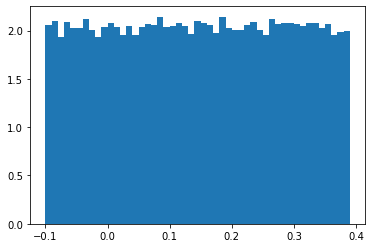

In [10]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

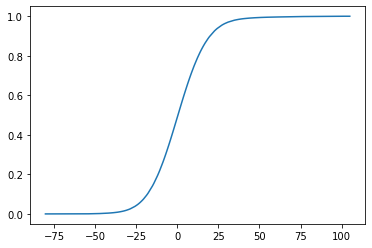

In [11]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [12]:
X2[int(N*0.59)]

3.6445594

In [13]:
len(ukb_emb)

21051

In [14]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [15]:
ukb_positive

dim132    1.000000
dim176    1.000000
dim110    0.989882
dim3      0.968648
dim192    0.903758
            ...   
dim226    0.175384
dim118    0.159090
dim66     0.139423
dim161    0.060947
dim204    0.000000
Length: 256, dtype: float64

In [16]:
ukb_positive[10:50]

dim40     0.862429
dim250    0.849936
dim100    0.844710
dim70     0.820436
dim28     0.803145
dim129    0.794072
dim107    0.793074
dim151    0.765759
dim246    0.758729
dim168    0.753076
dim152    0.747613
dim248    0.746378
dim162    0.744905
dim99     0.739490
dim239    0.738302
dim33     0.735119
dim101    0.726806
dim31     0.726189
dim93     0.724526
dim238    0.724289
dim128    0.720441
dim65     0.711510
dim125    0.697212
dim26     0.686476
dim123    0.684101
dim144    0.682010
dim198    0.681203
dim85     0.673650
dim91     0.668519
dim206    0.665954
dim138    0.665384
dim88     0.662391
dim157    0.656691
dim45     0.653793
dim24     0.651656
dim255    0.649185
dim73     0.646288
dim37     0.646240
dim193    0.644815
dim21     0.643865
dtype: float64

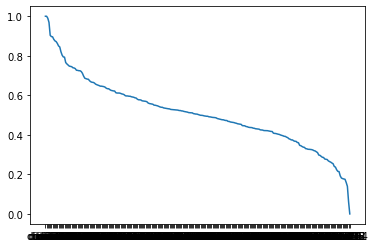

In [17]:
plt.plot(ukb_positive)

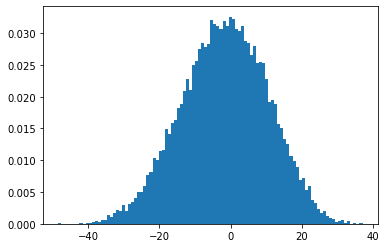

In [18]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

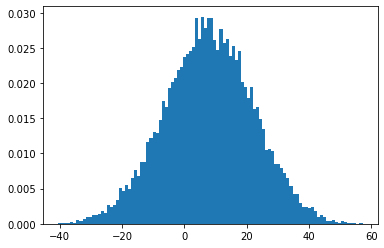

In [19]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

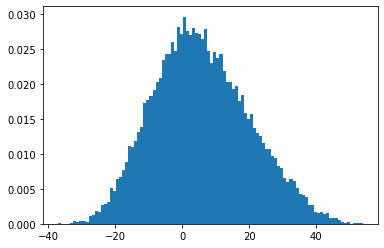

In [20]:
p = plt.hist(ukb_emb.loc[:,"dim188"], bins=100, density=True)

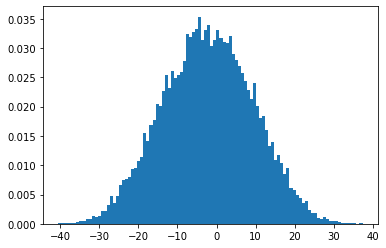

In [21]:
p = plt.hist(ukb_emb.loc[:,"dim10"], bins=100, density=True)

# Schizophrene

In [22]:
# norm = schiz_emb.apply(np.linalg.norm, axis=1)
# schiz_emb = schiz_emb.div(norm, axis=0)

In [23]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [24]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

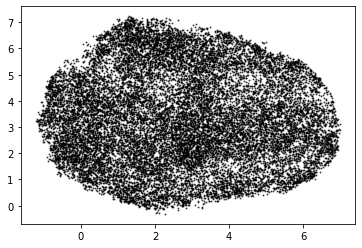

In [25]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [26]:
visual_schiz_emb = reducer.transform(schiz_emb)

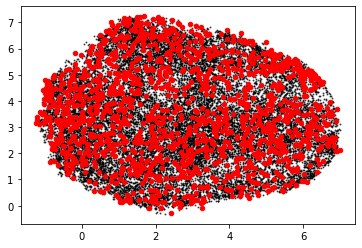

In [27]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)
plt.scatter(visual_schiz_emb[:,0], visual_schiz_emb[:,1], c='red', s=20, alpha=1)

In [28]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)

In [29]:
schiz_order = schiz_emb.copy()
schiz_order.loc["ukb_positive",:] = ukb_positive
schiz_order

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
1,-3.072455,2.118755,14.767071,25.323727,-1.895218,-11.848566,-2.848450,0.804875,10.158325,8.894309,...,-10.301551,8.681802,-5.134368,8.642966,-4.594979,-11.185109,-7.091903,16.353384,15.851475,8.768789
10,-6.363084,8.495188,13.130330,15.011291,-1.502464,-11.951797,4.895388,-6.296835,8.275889,7.314315,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
101,-8.257000,3.193301,15.231000,20.250187,2.875174,-9.162669,-0.456581,-4.579922,9.040375,10.708309,...,-13.839887,4.902569,-8.907161,15.914965,-8.117872,-11.600168,-7.630724,15.217825,13.910052,7.521028
102,0.839718,-1.255594,17.830366,14.800897,20.497416,0.962200,-12.739301,11.242928,-3.308038,9.281855,...,4.957207,30.968160,21.090038,-0.712377,-6.535363,0.837732,-14.335162,-6.496050,0.912047,1.447410
103,-2.120831,2.042139,14.197330,17.241810,0.429853,-6.865176,-15.585414,10.616910,9.235665,13.542730,...,-1.268514,9.333933,23.334452,14.609701,1.738005,-14.977012,-16.420273,-2.136248,14.604097,-12.011323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,-1.912347,-10.012351,26.258290,-6.525228,0.222735,12.820898,9.364318,4.255577,13.618147,-14.356390,...,3.029812,10.666740,5.456002,10.903213,-8.129805,20.262196,-2.148044,-7.108914,11.137066,2.314561
sub-ye110322_ses-v1,4.421231,-10.174214,15.189058,12.169552,-4.649335,4.747655,-10.108396,7.855030,7.429811,4.654629,...,17.957844,15.705018,5.530549,6.932653,1.356405,-0.227434,-16.601837,-22.949583,2.911914,-3.222028
sub-yh100442_ses-v1,1.813357,-10.222249,25.658092,11.041182,12.822204,11.961599,11.217562,9.294209,9.733081,-17.851082,...,3.455302,1.673933,4.371448,-1.121925,3.309279,-12.029107,-24.181362,1.078320,4.052058,-2.685082


In [30]:
schiz_order = schiz_order.sort_values(schiz_order.last_valid_index(), ascending=False, axis=1)

In [31]:
schiz_order

,dim132,dim176,dim110,dim3,dim192,dim127,dim9,dim61,dim166,dim187,...,dim143,dim120,dim214,dim140,dim126,dim226,dim118,dim66,dim161,dim204
ID,,,,,,,,,,,,,,,,,,,,,
1,89.028510,47.750595,31.741726,14.767071,10.828121,14.876190,10.158325,15.261963,15.217409,7.746001,...,-10.773915,-1.926133,-13.850508,-5.904721,7.881104,7.582566,-11.943854,-4.207176,-34.164960,-37.791420
10,84.941870,50.533978,23.757505,13.130330,10.969214,8.604526,8.275889,13.252572,1.647718,0.485871,...,-9.665059,-6.516066,-19.934856,0.604020,5.846082,8.966967,-6.021812,-2.167409,-31.484230,-40.721043
101,87.282790,52.576340,29.174332,15.231000,17.637894,12.956857,9.040375,14.069749,4.137158,10.392562,...,-11.786949,-1.936173,-26.182335,-0.546174,0.651144,11.045698,-3.765825,-5.492154,-28.086313,-46.606564
102,71.944030,46.649210,13.727229,17.830366,12.060467,21.660423,-3.308038,-1.644518,31.058949,28.404934,...,-18.138018,3.646799,-3.859644,-9.485784,-15.481026,-17.312174,-6.439183,-9.960659,-1.590506,-46.782658
103,68.086590,50.965880,3.313926,14.197330,5.898357,17.656132,9.235665,-5.601183,37.129932,33.994614,...,-10.774042,-5.332991,-1.249774,16.706380,2.807162,-25.633787,6.718390,-13.111442,3.136777,-53.277023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,83.337020,37.587000,64.439260,26.258290,21.074348,21.842018,13.618147,23.061695,19.050808,17.318594,...,-20.848303,-0.212666,-12.750740,-41.625862,-23.172293,-12.064702,-22.644249,-5.545855,-53.760036,-31.319633
sub-ye110322_ses-v1,76.412310,31.966784,26.700975,15.189058,24.113720,22.565000,7.429811,7.448486,48.120950,22.509035,...,-1.377323,-6.278569,-0.267370,-22.707850,-3.898832,-20.205727,-24.646828,-20.978610,-21.439365,-38.638420
sub-yh100442_ses-v1,64.070595,43.475105,3.981651,25.658092,30.789360,26.675957,9.733081,-0.170228,28.150509,31.831625,...,-7.355201,-12.524652,-43.687283,-7.411229,-13.797477,-21.163145,8.712947,-3.504831,-4.755792,-55.971767


# Fit on schiz datasets

In [32]:
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
1,-3.072455,2.118755,14.767071,25.323727,-1.895218,-11.848566,-2.848450,0.804875,10.158325,8.894309,...,-10.301551,8.681802,-5.134368,8.642966,-4.594979,-11.185109,-7.091903,16.353384,15.851475,8.768789
10,-6.363084,8.495188,13.130330,15.011291,-1.502464,-11.951797,4.895388,-6.296835,8.275889,7.314315,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
101,-8.257000,3.193301,15.231000,20.250187,2.875174,-9.162669,-0.456581,-4.579922,9.040375,10.708309,...,-13.839887,4.902569,-8.907161,15.914965,-8.117872,-11.600168,-7.630724,15.217825,13.910052,7.521028
102,0.839718,-1.255594,17.830366,14.800897,20.497416,0.962200,-12.739301,11.242928,-3.308038,9.281855,...,4.957207,30.968160,21.090038,-0.712377,-6.535363,0.837732,-14.335162,-6.496050,0.912047,1.447410
103,-2.120831,2.042139,14.197330,17.241810,0.429853,-6.865176,-15.585414,10.616910,9.235665,13.542730,...,-1.268514,9.333933,23.334452,14.609701,1.738005,-14.977012,-16.420273,-2.136248,14.604097,-12.011323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,8.529251,-4.346621,12.679420,-9.625874,-3.822075,2.099112,6.923754,-8.144130,15.322812,-20.103388,...,3.814035,0.100980,-16.517189,23.651382,-4.204888,20.095995,2.357023,-1.322250,0.266107,-10.865107
sub-va110289_ses-v1,-1.912347,-10.012351,26.258290,-6.525228,0.222735,12.820898,9.364318,4.255577,13.618147,-14.356390,...,3.029812,10.666740,5.456002,10.903213,-8.129805,20.262196,-2.148044,-7.108914,11.137066,2.314561
sub-ye110322_ses-v1,4.421231,-10.174214,15.189058,12.169552,-4.649335,4.747655,-10.108396,7.855030,7.429811,4.654629,...,17.957844,15.705018,5.530549,6.932653,1.356405,-0.227434,-16.601837,-22.949583,2.911914,-3.222028


In [33]:
schiz_all = pd.merge(schiz_label, schiz_emb, left_index=True, right_index=True)

In [34]:
schiz_precatatoes = schiz_all[schiz_all.study=="PreCatatoes"]

In [35]:
d = {'control': 0, "schizophrenia": 1}
train = schiz_all.loc[schiz_all.index.isin(schiz_train[0]),:]
y_train = train['diagnosis'].map(d)
X_train = train.iloc[:, 5:]
val = schiz_all.loc[schiz_all.index.isin(schiz_val[0]),:]
y_val = val['diagnosis'].map(d)
X_val = val.iloc[:, 5:]
test_intra = schiz_all.loc[schiz_all.index.isin(schiz_test_intra[0]),:]
y_test_intra = test_intra['diagnosis'].map(d)
X_test_intra = test_intra.iloc[:, 5:]
test = schiz_all.loc[schiz_all.index.isin(schiz_test[0]),:]
y_test = test['diagnosis'].map(d)
X_test = test.iloc[:, 5:]

In [36]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV07WT2ZL3,M,29.0,control,BSNIP,Dallas,5.387369,15.980943,19.556358,5.708955,-11.545917,...,-12.896300,3.673454,-0.294316,21.773642,6.313263,-9.168741,0.724466,-16.015314,20.218885,-18.738298
sub-INV0AL14J6U,M,43.0,schizophrenia,BSNIP,Dallas,-14.213929,4.146411,11.663381,7.406934,-7.543089,...,-16.260986,4.119909,9.218355,21.843351,-1.489751,8.767689,-14.981532,14.408728,39.447803,3.007062
sub-INV14XK7P6E,M,30.0,control,BSNIP,Dallas,-2.843771,-17.000845,19.075920,2.505329,16.418022,...,-5.096287,6.775822,-1.913326,-6.993805,5.471582,19.330605,0.071899,1.076871,13.153438,23.248434
sub-INV23XFB3ZA,M,25.0,schizophrenia,BSNIP,Dallas,-3.488384,-1.832377,18.536360,-6.591970,26.725637,...,3.837007,7.677874,11.828647,20.524122,-7.514709,-4.440970,11.691256,0.715015,-29.744768,2.632451
sub-INV25C66ABC,F,49.0,schizophrenia,BSNIP,Dallas,0.915036,-5.282201,23.444305,-13.315985,-0.852469,...,16.119026,20.033426,24.061653,6.497477,0.506043,0.103699,-14.800347,-13.799755,1.271356,-0.176944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10090_ses-v1,M,20.0,control,PRAGUE,PRAGUE,18.906650,6.862321,8.999235,-7.000411,-20.272509,...,9.792595,7.391916,5.236455,13.709249,6.256622,18.680277,16.132198,1.981867,18.092463,-23.599775
sub-ESOC10060_ses-v1,F,26.0,control,PRAGUE,PRAGUE,3.653410,-3.533056,15.382061,6.031735,-11.234264,...,8.410913,16.555307,-12.810852,27.738550,0.073819,13.798696,-2.969131,4.246887,6.373902,-10.802502
sub-ESOC10019_ses-v1,F,28.0,control,PRAGUE,PRAGUE,-8.625013,-4.152237,20.445179,26.928171,-2.963998,...,-7.033324,6.479877,-7.574035,2.508362,12.995200,-9.366879,-27.798868,14.585735,28.555658,-9.215862
sub-ESOC10063_ses-v1,M,31.0,control,PRAGUE,PRAGUE,-0.660883,10.689399,13.632514,0.380142,-22.330957,...,-0.944177,-7.423020,7.503934,13.343184,11.114659,-5.349842,-9.957487,-27.700577,30.681974,-29.105780


In [37]:
X_train.shape

(903, 256)

In [38]:
bst = XGBClassifier(max_depth=1, min_child_weight=5, alpha=1, learning_rate=0.001, objective='binary:logistic')

In [39]:
X_train.shape

(903, 256)

In [40]:
y_train.shape

(903,)

In [41]:
bst.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
roc_auc_score(y_train, bst.predict_proba(X_train)[:,1])

0.585652085349086

In [43]:
roc_auc_score(y_val, bst.predict_proba(X_val)[:,1])

0.4665032679738562

In [44]:
roc_auc_score(y_test_intra, bst.predict_proba(X_test_intra)[:,1])

0.4968954248366013

In [45]:
roc_auc_score(y_test, bst.predict_proba(X_test)[:,1])

0.49411933448078027

In [46]:
param_grid = {
    'max_depth': [1],
    'learning_rate': [0.0001],
    'subsample': [0.2]
}

In [47]:
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)

In [48]:
X.shape

(1016, 256)

In [49]:
# Grid-search all parameter combinations using a validation set.
opt = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic'), cv=pds, param_grid = param_grid)
opt.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.0001], 'max_depth': [1],
                         'subsample': [0.2]})

In [50]:
roc_auc_score(y_train, opt.best_estimator_.predict_proba(X_train)[:,1])

0.6413072261547079

In [51]:
roc_auc_score(y_val, opt.best_estimator_.predict_proba(X_val)[:,1])

0.5826797385620914

In [52]:
roc_auc_score(y_test_intra, opt.best_estimator_.predict_proba(X_test_intra)[:,1])

0.5192810457516339

In [53]:
roc_auc_score(y_test, opt.best_estimator_.predict_proba(X_test)[:,1])

0.4732808786165068

In [54]:
opt.best_params_

{'learning_rate': 0.0001, 'max_depth': 1, 'subsample': 0.2}

# UMAP

In [55]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.223268,-1.910213,-4.233976,23.503736,11.443585,8.791657,-19.330896,9.398713,12.036551,20.609098,...,17.275707,19.637380,23.902270,6.220823,-1.704380,8.290183,-10.330559,1.080888,10.457481,-3.583808
sub-1000458,-1.487145,-11.373998,22.498978,12.430387,13.282054,6.232186,-9.554647,11.808377,11.785677,-1.828716,...,10.948754,3.683073,13.204277,3.243385,2.440976,-21.187466,-19.015520,-8.354998,-5.511058,14.558917
sub-1000575,6.581354,1.730981,23.259293,-16.387560,-1.729303,-7.419610,12.355750,-17.623606,4.551756,18.279514,...,16.038273,21.737465,-6.228678,23.004549,15.599153,14.835086,20.791817,-9.450769,16.728659,3.886695
sub-1000606,-10.529222,-0.987313,27.112442,7.748507,12.663799,-8.886915,21.285873,5.773342,-0.787316,6.343807,...,-2.380115,6.828644,20.211292,5.759085,5.581007,-3.729945,-23.506893,1.081652,18.528513,-3.506488
sub-1000963,-1.465720,3.356936,18.716183,13.292232,-8.116371,3.039847,-8.254723,27.690653,5.612602,23.423693,...,6.647476,9.744260,33.864700,-0.016434,11.216681,-15.389115,-19.265200,11.988581,2.000807,-2.332965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,2.878745,-4.253128,17.483282,-4.064491,-13.859284,-1.935637,13.345888,7.350535,20.608257,0.863736,...,3.249543,21.022793,-5.036903,0.574743,6.367704,34.204155,6.475176,3.726127,13.607699,9.167556
sub-6023808,7.852437,-10.590528,16.383102,-8.025912,-5.520872,-6.413332,18.045626,-7.885871,26.925823,-10.883697,...,9.270588,10.658528,-16.836027,8.665563,13.203258,16.137606,2.157325,-17.735548,18.451640,7.117024
sub-6023847,13.306204,-10.247489,15.500339,18.971727,9.477009,10.342031,-0.777918,12.333806,8.913639,8.128776,...,25.283250,40.150448,13.482981,-0.217624,-1.209999,11.226042,-17.846478,11.902345,10.950462,4.230294


In [56]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV07WT2ZL3,M,29.0,control,BSNIP,Dallas,5.387369,15.980943,19.556358,5.708955,-11.545917,...,-12.896300,3.673454,-0.294316,21.773642,6.313263,-9.168741,0.724466,-16.015314,20.218885,-18.738298
sub-INV0AL14J6U,M,43.0,schizophrenia,BSNIP,Dallas,-14.213929,4.146411,11.663381,7.406934,-7.543089,...,-16.260986,4.119909,9.218355,21.843351,-1.489751,8.767689,-14.981532,14.408728,39.447803,3.007062
sub-INV14XK7P6E,M,30.0,control,BSNIP,Dallas,-2.843771,-17.000845,19.075920,2.505329,16.418022,...,-5.096287,6.775822,-1.913326,-6.993805,5.471582,19.330605,0.071899,1.076871,13.153438,23.248434
sub-INV23XFB3ZA,M,25.0,schizophrenia,BSNIP,Dallas,-3.488384,-1.832377,18.536360,-6.591970,26.725637,...,3.837007,7.677874,11.828647,20.524122,-7.514709,-4.440970,11.691256,0.715015,-29.744768,2.632451
sub-INV25C66ABC,F,49.0,schizophrenia,BSNIP,Dallas,0.915036,-5.282201,23.444305,-13.315985,-0.852469,...,16.119026,20.033426,24.061653,6.497477,0.506043,0.103699,-14.800347,-13.799755,1.271356,-0.176944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10090_ses-v1,M,20.0,control,PRAGUE,PRAGUE,18.906650,6.862321,8.999235,-7.000411,-20.272509,...,9.792595,7.391916,5.236455,13.709249,6.256622,18.680277,16.132198,1.981867,18.092463,-23.599775
sub-ESOC10060_ses-v1,F,26.0,control,PRAGUE,PRAGUE,3.653410,-3.533056,15.382061,6.031735,-11.234264,...,8.410913,16.555307,-12.810852,27.738550,0.073819,13.798696,-2.969131,4.246887,6.373902,-10.802502
sub-ESOC10019_ses-v1,F,28.0,control,PRAGUE,PRAGUE,-8.625013,-4.152237,20.445179,26.928171,-2.963998,...,-7.033324,6.479877,-7.574035,2.508362,12.995200,-9.366879,-27.798868,14.585735,28.555658,-9.215862
sub-ESOC10063_ses-v1,M,31.0,control,PRAGUE,PRAGUE,-0.660883,10.689399,13.632514,0.380142,-22.330957,...,-0.944177,-7.423020,7.503934,13.343184,11.114659,-5.349842,-9.957487,-27.700577,30.681974,-29.105780


In [57]:
train.iloc[:,5:]

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV07WT2ZL3,5.387369,15.980943,19.556358,5.708955,-11.545917,-15.318916,0.684585,-7.595194,4.999828,-3.971835,...,-12.896300,3.673454,-0.294316,21.773642,6.313263,-9.168741,0.724466,-16.015314,20.218885,-18.738298
sub-INV0AL14J6U,-14.213929,4.146411,11.663381,7.406934,-7.543089,-2.177100,19.332268,-17.083712,1.766415,14.964138,...,-16.260986,4.119909,9.218355,21.843351,-1.489751,8.767689,-14.981532,14.408728,39.447803,3.007062
sub-INV14XK7P6E,-2.843771,-17.000845,19.075920,2.505329,16.418022,2.132830,8.123776,8.431469,30.168243,-15.575345,...,-5.096287,6.775822,-1.913326,-6.993805,5.471582,19.330605,0.071899,1.076871,13.153438,23.248434
sub-INV23XFB3ZA,-3.488384,-1.832377,18.536360,-6.591970,26.725637,21.250300,-23.875875,8.950507,0.446178,2.195329,...,3.837007,7.677874,11.828647,20.524122,-7.514709,-4.440970,11.691256,0.715015,-29.744768,2.632451
sub-INV25C66ABC,0.915036,-5.282201,23.444305,-13.315985,-0.852469,8.412024,3.038191,-6.259659,-23.826332,2.299982,...,16.119026,20.033426,24.061653,6.497477,0.506043,0.103699,-14.800347,-13.799755,1.271356,-0.176944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10090_ses-v1,18.906650,6.862321,8.999235,-7.000411,-20.272509,0.577606,4.248726,10.977431,22.816101,9.357537,...,9.792595,7.391916,5.236455,13.709249,6.256622,18.680277,16.132198,1.981867,18.092463,-23.599775
sub-ESOC10060_ses-v1,3.653410,-3.533056,15.382061,6.031735,-11.234264,-9.823856,-6.021539,-2.985203,14.865223,1.314317,...,8.410913,16.555307,-12.810852,27.738550,0.073819,13.798696,-2.969131,4.246887,6.373902,-10.802502
sub-ESOC10019_ses-v1,-8.625013,-4.152237,20.445179,26.928171,-2.963998,-6.947720,15.283830,13.153730,22.073220,-3.616272,...,-7.033324,6.479877,-7.574035,2.508362,12.995200,-9.366879,-27.798868,14.585735,28.555658,-9.215862
sub-ESOC10063_ses-v1,-0.660883,10.689399,13.632514,0.380142,-22.330957,-0.688858,7.750637,-7.030252,-3.881699,-6.717252,...,-0.944177,-7.423020,7.503934,13.343184,11.114659,-5.349842,-9.957487,-27.700577,30.681974,-29.105780


In [58]:
schiz_precatatoes

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,M,63.0,schizophrenia,PreCatatoes,Sainte-Anne,-3.072455,2.118755,14.767071,25.323727,-1.895218,...,-10.301551,8.681802,-5.134368,8.642966,-4.594979,-11.185109,-7.091903,16.353384,15.851475,8.768789
2,M,45.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.363084,8.495188,13.130330,15.011291,-1.502464,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
3,M,26.0,schizophrenia,PreCatatoes,Sainte-Anne,-5.744237,6.152669,7.483620,35.717926,-1.045445,...,-18.117142,5.174769,1.963661,12.636565,-13.959313,-10.519180,-10.342235,16.837337,17.172710,8.289303
4,F,68.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.195689,7.752417,14.114051,14.969311,-1.503684,...,-19.386343,2.437435,-11.515302,13.980516,-6.108913,-5.346655,-2.977861,14.481285,16.295866,6.340888
5,F,48.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.363084,8.495188,13.130330,15.011291,-1.502464,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,M,53.0,schizophrenia,PreCatatoes,Sainte-Anne,-9.216475,6.476647,11.928370,18.187720,-7.756075,...,-14.188340,4.324974,-9.988635,24.199127,-11.180803,-15.761246,-11.872940,15.287396,21.340113,-3.653131
183,F,19.0,schizophrenia,PreCatatoes,Sainte-Anne,6.573618,-7.969989,39.878162,-24.878620,8.323234,...,7.924120,14.152616,-14.205442,7.323472,11.246972,-0.061915,7.747245,-14.304519,-6.120320,5.280794
184,M,26.0,control,PreCatatoes,Sainte-Anne,-3.740845,-5.576817,20.037374,5.642529,14.635774,...,18.912529,5.457115,12.258763,0.563890,14.757903,-10.278390,-13.116734,-10.338963,-15.860286,1.824605
185,M,29.0,schizophrenia,PreCatatoes,Sainte-Anne,-2.993503,-2.052152,21.932806,8.303184,14.418889,...,-9.120643,15.605950,-2.257872,7.088430,-12.125056,-3.028307,-4.603898,4.075317,-9.092802,18.768316


In [59]:
reducer = UMAP()
umap_ukb = reducer.fit_transform(ukb_emb)

In [60]:
umap_schiz = reducer.transform(train.iloc[:, 5:])

In [61]:
umap_precatatoes = reducer.transform(schiz_precatatoes.iloc[:, 5:])

In [62]:
umap_ukb.shape

(21051, 2)

In [63]:
cmap = {'control':'b', 'schizophrenia':'r'}
colors = [cmap[diag] for diag in train.diagnosis]
colors_precatatoes = [cmap[diag] for diag in schiz_precatatoes.diagnosis]

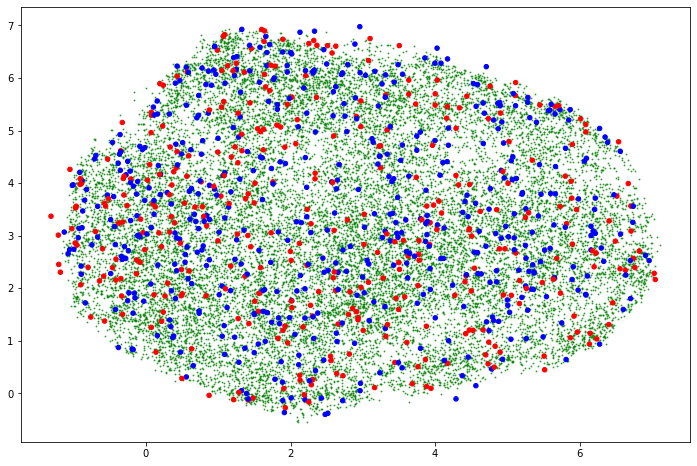

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_schiz[:,0], umap_schiz[:,1], s=20, c=colors, alpha=1)
plt.show()

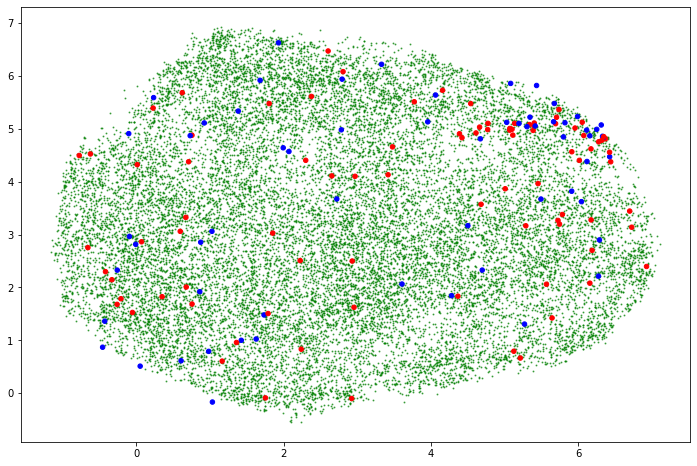

In [65]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_precatatoes[:,0], umap_precatatoes[:,1], s=20, c=colors_precatatoes, alpha=1)
plt.show()

In [66]:
precatatoes_labels = pd.read_csv(precatatoes_file, dtype={'participant_id':str})[["participant_id", "catatonie"]]
precatatoes_labels.set_index("participant_id", inplace=True)

In [67]:
precatatoes_labels.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '176', '178', '179', '180', '181', '182', '183', '184', '185', '186'],
      dtype='object', name='participant_id', length=162)

In [68]:
schiz_precatatoes.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '175', '176', '178', '179', '181', '182', '183', '184', '185', '186'],
      dtype='object', length=150)

In [69]:
schiz_precatatoes_cat = pd.merge(precatatoes_labels, schiz_precatatoes, left_index=True, right_index=True)

In [70]:
schiz_precatatoes_cat = schiz_precatatoes_cat[schiz_precatatoes_cat.diagnosis=="schizophrenia"]

In [71]:
schiz_precatatoes_cat

,catatonie,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,oui,M,63.0,schizophrenia,PreCatatoes,Sainte-Anne,-3.072455,2.118755,14.767071,25.323727,...,-10.301551,8.681802,-5.134368,8.642966,-4.594979,-11.185109,-7.091903,16.353384,15.851475,8.768789
2,oui,M,45.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.363084,8.495188,13.130330,15.011291,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
3,non,M,26.0,schizophrenia,PreCatatoes,Sainte-Anne,-5.744237,6.152669,7.483620,35.717926,...,-18.117142,5.174769,1.963661,12.636565,-13.959313,-10.519180,-10.342235,16.837337,17.172710,8.289303
4,non,F,68.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.195689,7.752417,14.114051,14.969311,...,-19.386343,2.437435,-11.515302,13.980516,-6.108913,-5.346655,-2.977861,14.481285,16.295866,6.340888
5,oui,F,48.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.363084,8.495188,13.130330,15.011291,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,non,M,57.0,schizophrenia,PreCatatoes,Sainte-Anne,-2.021070,2.605049,14.292665,5.792049,...,-9.860587,16.051577,-13.212305,23.771755,-15.693761,3.329534,-1.092519,11.267173,-2.877362,10.920363
182,non,M,53.0,schizophrenia,PreCatatoes,Sainte-Anne,-9.216475,6.476647,11.928370,18.187720,...,-14.188340,4.324974,-9.988635,24.199127,-11.180803,-15.761246,-11.872940,15.287396,21.340113,-3.653131
183,non,F,19.0,schizophrenia,PreCatatoes,Sainte-Anne,6.573618,-7.969989,39.878162,-24.878620,...,7.924120,14.152616,-14.205442,7.323472,11.246972,-0.061915,7.747245,-14.304519,-6.120320,5.280794
185,oui,M,29.0,schizophrenia,PreCatatoes,Sainte-Anne,-2.993503,-2.052152,21.932806,8.303184,...,-9.120643,15.605950,-2.257872,7.088430,-12.125056,-3.028307,-4.603898,4.075317,-9.092802,18.768316


In [72]:
cmap = {'non':'b', 'oui':'r'}
colors_catatonie = [cmap[diag] for diag in schiz_precatatoes_cat.catatonie]

In [73]:
umap_cat = reducer.transform(schiz_precatatoes_cat.iloc[:, 6:])

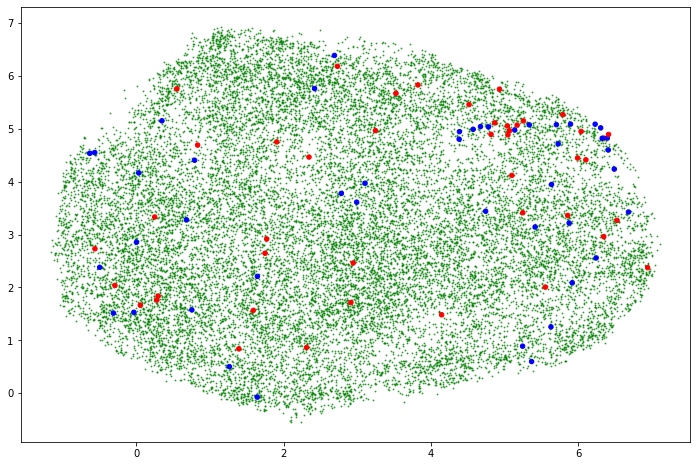

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_cat[:,0], umap_cat[:,1], s=20, c=colors_catatonie, alpha=1)
plt.show()

In [75]:
schiz_precatatoes_cat

,catatonie,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,oui,M,63.0,schizophrenia,PreCatatoes,Sainte-Anne,-3.072455,2.118755,14.767071,25.323727,...,-10.301551,8.681802,-5.134368,8.642966,-4.594979,-11.185109,-7.091903,16.353384,15.851475,8.768789
2,oui,M,45.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.363084,8.495188,13.130330,15.011291,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
3,non,M,26.0,schizophrenia,PreCatatoes,Sainte-Anne,-5.744237,6.152669,7.483620,35.717926,...,-18.117142,5.174769,1.963661,12.636565,-13.959313,-10.519180,-10.342235,16.837337,17.172710,8.289303
4,non,F,68.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.195689,7.752417,14.114051,14.969311,...,-19.386343,2.437435,-11.515302,13.980516,-6.108913,-5.346655,-2.977861,14.481285,16.295866,6.340888
5,oui,F,48.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.363084,8.495188,13.130330,15.011291,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,non,M,57.0,schizophrenia,PreCatatoes,Sainte-Anne,-2.021070,2.605049,14.292665,5.792049,...,-9.860587,16.051577,-13.212305,23.771755,-15.693761,3.329534,-1.092519,11.267173,-2.877362,10.920363
182,non,M,53.0,schizophrenia,PreCatatoes,Sainte-Anne,-9.216475,6.476647,11.928370,18.187720,...,-14.188340,4.324974,-9.988635,24.199127,-11.180803,-15.761246,-11.872940,15.287396,21.340113,-3.653131
183,non,F,19.0,schizophrenia,PreCatatoes,Sainte-Anne,6.573618,-7.969989,39.878162,-24.878620,...,7.924120,14.152616,-14.205442,7.323472,11.246972,-0.061915,7.747245,-14.304519,-6.120320,5.280794
185,oui,M,29.0,schizophrenia,PreCatatoes,Sainte-Anne,-2.993503,-2.052152,21.932806,8.303184,...,-9.120643,15.605950,-2.257872,7.088430,-12.125056,-3.028307,-4.603898,4.075317,-9.092802,18.768316


In [157]:
reducer_cat = UMAP()
reducer_cat.fit(schiz_precatatoes_cat[schiz_precatatoes_cat.catatonie=="oui"].iloc[:, 6:])
umap_cat2 = reducer_cat.transform(schiz_precatatoes_cat.iloc[:, 6:])

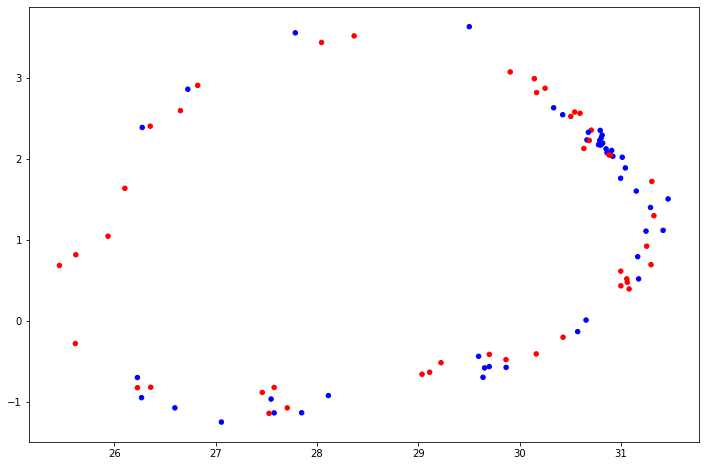

In [158]:
plt.figure(figsize=(12,8))
plt.scatter(umap_cat2[:,0], umap_cat2[:,1], s=20, c=colors_catatonie, alpha=1)
plt.show()

In [159]:
schiz_precatatoes_cat

,catatonie,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,oui,M,63.0,schizophrenia,PreCatatoes,Sainte-Anne,-3.072455,2.118755,14.767071,25.323727,...,-10.301551,8.681802,-5.134368,8.642966,-4.594979,-11.185109,-7.091903,16.353384,15.851475,8.768789
2,oui,M,45.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.363084,8.495188,13.130330,15.011291,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
3,non,M,26.0,schizophrenia,PreCatatoes,Sainte-Anne,-5.744237,6.152669,7.483620,35.717926,...,-18.117142,5.174769,1.963661,12.636565,-13.959313,-10.519180,-10.342235,16.837337,17.172710,8.289303
4,non,F,68.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.195689,7.752417,14.114051,14.969311,...,-19.386343,2.437435,-11.515302,13.980516,-6.108913,-5.346655,-2.977861,14.481285,16.295866,6.340888
5,oui,F,48.0,schizophrenia,PreCatatoes,Sainte-Anne,-6.363084,8.495188,13.130330,15.011291,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,non,M,57.0,schizophrenia,PreCatatoes,Sainte-Anne,-2.021070,2.605049,14.292665,5.792049,...,-9.860587,16.051577,-13.212305,23.771755,-15.693761,3.329534,-1.092519,11.267173,-2.877362,10.920363
182,non,M,53.0,schizophrenia,PreCatatoes,Sainte-Anne,-9.216475,6.476647,11.928370,18.187720,...,-14.188340,4.324974,-9.988635,24.199127,-11.180803,-15.761246,-11.872940,15.287396,21.340113,-3.653131
183,non,F,19.0,schizophrenia,PreCatatoes,Sainte-Anne,6.573618,-7.969989,39.878162,-24.878620,...,7.924120,14.152616,-14.205442,7.323472,11.246972,-0.061915,7.747245,-14.304519,-6.120320,5.280794
185,oui,M,29.0,schizophrenia,PreCatatoes,Sainte-Anne,-2.993503,-2.052152,21.932806,8.303184,...,-9.120643,15.605950,-2.257872,7.088430,-12.125056,-3.028307,-4.603898,4.075317,-9.092802,18.768316


In [161]:
model = SVC(kernel='linear', probability=True, C=0.01, class_weight='balanced', decision_function_shape='ovr')

In [162]:
model.fit(schiz_precatatoes_cat.iloc[:,6:], schiz_precatatoes_cat.iloc[:,0])
roc_auc_score(Y, proba_pred, multi_class='ovr', average=None)

SVC(C=0.01, class_weight='balanced', kernel='linear', probability=True)

In [ ]:
val_pred = cross_val_predict(model, schiz_precatatoes_cat.iloc[:,6:], schiz_precatatoes_cat.iloc[:,0], cv=3)